In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [163]:
CLIENT_ID = '0XKX2RX2NRRD0FADR5PGUQ1YDX1MWT2WVCWQ5F5ZNMZVL4HC' # your Foursquare ID
CLIENT_SECRET = 'ZA50HUYWOWEMAMZXRMPIRAJJYNH14OMYGLKEBUKPP2S4GMMM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
radius = 500

In [164]:
# get UW's longitude and latitude
address = '1410 NE Campus Parkway, Seattle, WA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

47.6567423 -122.3127289


In [165]:
# pass in uw's location to explore nearby venues
url_uw = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
results = requests.get(url_uw).json()

# get uw's nearby venues
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '42a63500f964a52008251fe3',
  'name': 'UW: Henry Art Gallery',
  'location': {'address': 'NE Pacific St',
   'crossStreet': 'at 15th Ave NE',
   'lat': 47.65642450284154,
   'lng': -122.3117057905699,
   'labeledLatLngs': [{'label': 'display',
     'lat': 47.65642450284154,
     'lng': -122.3117057905699}],
   'distance': 84,
   'postalCode': '98195',
   'cc': 'US',
   'city': 'Seattle',
   'state': 'WA',
   'country': 'United States',
   'formattedAddress': ['NE Pacific St (at 15th Ave NE)',
    'Seattle, WA 98195',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d181941735',
    'name': 'Museum',
    'pluralName': 'Museums',
    'shortName': 'Museum',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0,

In [166]:
# create a dataframe showing all returned venues

dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,UW: Henry Art Gallery,Museum,NE Pacific St,at 15th Ave NE,47.656425,-122.311706,"[{'label': 'display', 'lat': 47.65642450284154...",84,98195,US,Seattle,WA,United States,"[NE Pacific St (at 15th Ave NE), Seattle, WA 9...",NaN,42a63500f964a52008251fe3
1,Sizzle&Crunch,Vietnamese Restaurant,1313 NE 42nd St,University Way NE,47.658331,-122.313561,"[{'label': 'display', 'lat': 47.65833106482488...",187,98105,US,Seattle,WA,United States,"[1313 NE 42nd St (University Way NE), Seattle,...",University District,5867284cb6e67d49c183e8cf
2,Meany Hall Theater,College Theater,1410 NE Campus Pkwy,NaN,47.655612,-122.310587,"[{'label': 'display', 'lat': 47.65561220570296...",204,98195,US,Seattle,WA,United States,"[1410 NE Campus Pkwy, Seattle, WA 98195, Unite...",NaN,4a9de4e9f964a520cc3920e3
3,College Inn Pub,Pub,4006 University Way NE,at Campus Parkway,47.655450,-122.313090,"[{'label': 'display', 'lat': 47.65545016420502...",146,98105,US,Seattle,WA,United States,"[4006 University Way NE (at Campus Parkway), S...",NaN,40b13b00f964a52053f61ee3
4,Bean and Bagel,Coffee Shop,1410 NE 40th St,NaN,47.655377,-122.312826,"[{'label': 'display', 'lat': 47.65537679339521...",152,98105,US,Seattle,WA,United States,"[1410 NE 40th St, Seattle, WA 98105, United St...",NaN,4a969ee0f964a520642620e3
5,Burger & Kabob Hut,Burger Joint,4142 University Way NE,at NE 41st St.,47.658157,-122.313302,"[{'label': 'display', 'lat': 47.65815733081145...",163,98105,US,Seattle,WA,United States,"[4142 University Way NE (at NE 41st St.), Seat...",NaN,49162c6af964a5206d521fe3
6,Shultzy's Sausage,German Restaurant,4114 University Way NE,at NE 41st St,47.657301,-122.313031,"[{'label': 'display', 'lat': 47.65730136821427...",66,98105,US,Seattle,WA,United States,"[4114 University Way NE (at NE 41st St), Seatt...",NaN,422b9980f964a520d11f1fe3
7,Cafe Solstice,Coffee Shop,4116 University Way NE,btwn NE 41st & 42nd St.,47.657445,-122.313186,"[{'label': 'display', 'lat': 47.65744508263717...",85,98105,US,Seattle,WA,United States,[4116 University Way NE (btwn NE 41st & 42nd S...,University District,45fc3064f964a52075441fe3
8,Sweet Alchemy Ice Cream,Ice Cream Shop,4301 University Way NE,NaN,47.659877,-122.313242,"[{'label': 'display', 'lat': 47.65987658496071...",351,98105,US,Seattle,WA,United States,"[4301 University Way NE, Seattle, WA 98105, Un...",NaN,56be08c8498e44ed4192b559
9,Bikram Hot Yoga U-District,Yoga Studio,4143 University Way NE,btw 42nd + 41st (Above Jimmy John's),47.658033,-122.313441,"[{'label': 'display', 'lat': 47.65803253386116...",153,98105,US,Seattle,WA,United States,[4143 University Way NE (btw 42nd + 41st (Abov...,NaN,51a96c8b7dd2ee03a4f7e812


In [145]:
dataframe_filtered.shape
# we got 50 venues

(50, 16)

In [146]:
# create a map with all venues listed, each popup shows its name and category

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='University of Washington',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, name, cat in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name, dataframe_filtered.categories):
    label = '{}, {}'.format(name, cat)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [167]:
# get all venues' ratings
rating = []

for venue_id in dataframe_filtered['id']:
    url_each = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result_each = requests.get(url_each).json()
    try:
        rating.append(result_each['response']['venue']['rating'])
    except:
        rating.append(-1)
rating

[8.3,
 8.2,
 8.1,
 7.9,
 7.9,
 7.8,
 7.8,
 7.7,
 8.7,
 7.7,
 7.6,
 7.6,
 7.6,
 7.6,
 7.5,
 8.0,
 8.4,
 7.5,
 7.4,
 8.1,
 7.6,
 7.6,
 7.9,
 7.3,
 8.5,
 7.4,
 8.4,
 8.4,
 7.1,
 7.1,
 8.2,
 7.1,
 7.5,
 8.1,
 7.0,
 7.0,
 6.9,
 6.9,
 6.9,
 7.5,
 6.9,
 7.0,
 7.2,
 6.7,
 6.7,
 7.3,
 6.7,
 6.7,
 6.8,
 6.9]

In [168]:
# add ratings to the dataframe, and clean the dataframe with only name, categories, address, rating, and id left
dataframe_filtered['rating'] = rating
dataframe_filtered = dataframe_filtered.loc[:,['name', 'categories', 'address', 'rating', 'id']]
dataframe_filtered.head()

,name,categories,address,rating,id
0,UW: Henry Art Gallery,Museum,NE Pacific St,8.3,42a63500f964a52008251fe3
1,Sizzle&Crunch,Vietnamese Restaurant,1313 NE 42nd St,8.2,5867284cb6e67d49c183e8cf
2,Meany Hall Theater,College Theater,1410 NE Campus Pkwy,8.1,4a9de4e9f964a520cc3920e3
3,College Inn Pub,Pub,4006 University Way NE,7.9,40b13b00f964a52053f61ee3
4,Bean and Bagel,Coffee Shop,1410 NE 40th St,7.9,4a969ee0f964a520642620e3


In [169]:
# sort venues based on ratings in descending order
dataframe_filtered = dataframe_filtered.sort_values('rating', ascending=False).reset_index(drop=True)
dataframe_filtered

,name,categories,address,rating,id
0,Sweet Alchemy Ice Cream,Ice Cream Shop,4301 University Way NE,8.7,56be08c8498e44ed4192b559
1,Pink Gorilla,Video Game Store,4341 University Way NE,8.5,4b10925ef964a5200c7323e3
2,Shawarma King,Mediterranean Restaurant,4337 University Way NE,8.4,4b6ba134f964a5205c132ce3
3,Neptune Theatre,Music Venue,1303 NE 45th St,8.4,465d9f53f964a52041471fe3
4,Portage Bay Cafe,Breakfast Spot,4130 Roosevelt Way NE,8.4,44e492f5f964a5205f371fe3
5,UW: Henry Art Gallery,Museum,NE Pacific St,8.3,42a63500f964a52008251fe3
6,Sizzle&Crunch,Vietnamese Restaurant,1313 NE 42nd St,8.2,5867284cb6e67d49c183e8cf
7,UW: Drumheller Fountain,Fountain,Drumheller Fountain,8.2,4beb11bf415e20a171d8e5bb
8,Trinity Market,Deli / Bodega,4301 Roosevelt Way NE,8.1,4ae127c0f964a520878521e3
9,Portage Bay Grange Feed & Mercantile,Pet Store,4110 Roosevelt Way NE,8.1,4da8ab66316ae350ac580535


In [170]:
# see the number of unique categories
print('There are {} uniques categories.'.format(len(dataframe_filtered['categories'].unique())))

There are 37 uniques categories.


In [171]:
# create a dataframe showing the occurrence of each category
cat_count = dataframe_filtered['categories'].value_counts()
cat_count = cat_count.reset_index()
cat_count.columns = ['categories', 'count']
cat_count

,categories,count
0,Coffee Shop,5
1,Vietnamese Restaurant,4
2,Dessert Shop,2
3,Chinese Restaurant,2
4,Korean Restaurant,2
5,Mediterranean Restaurant,2
6,Sandwich Place,2
7,Café,2
8,Burger Joint,1
9,Brewery,1


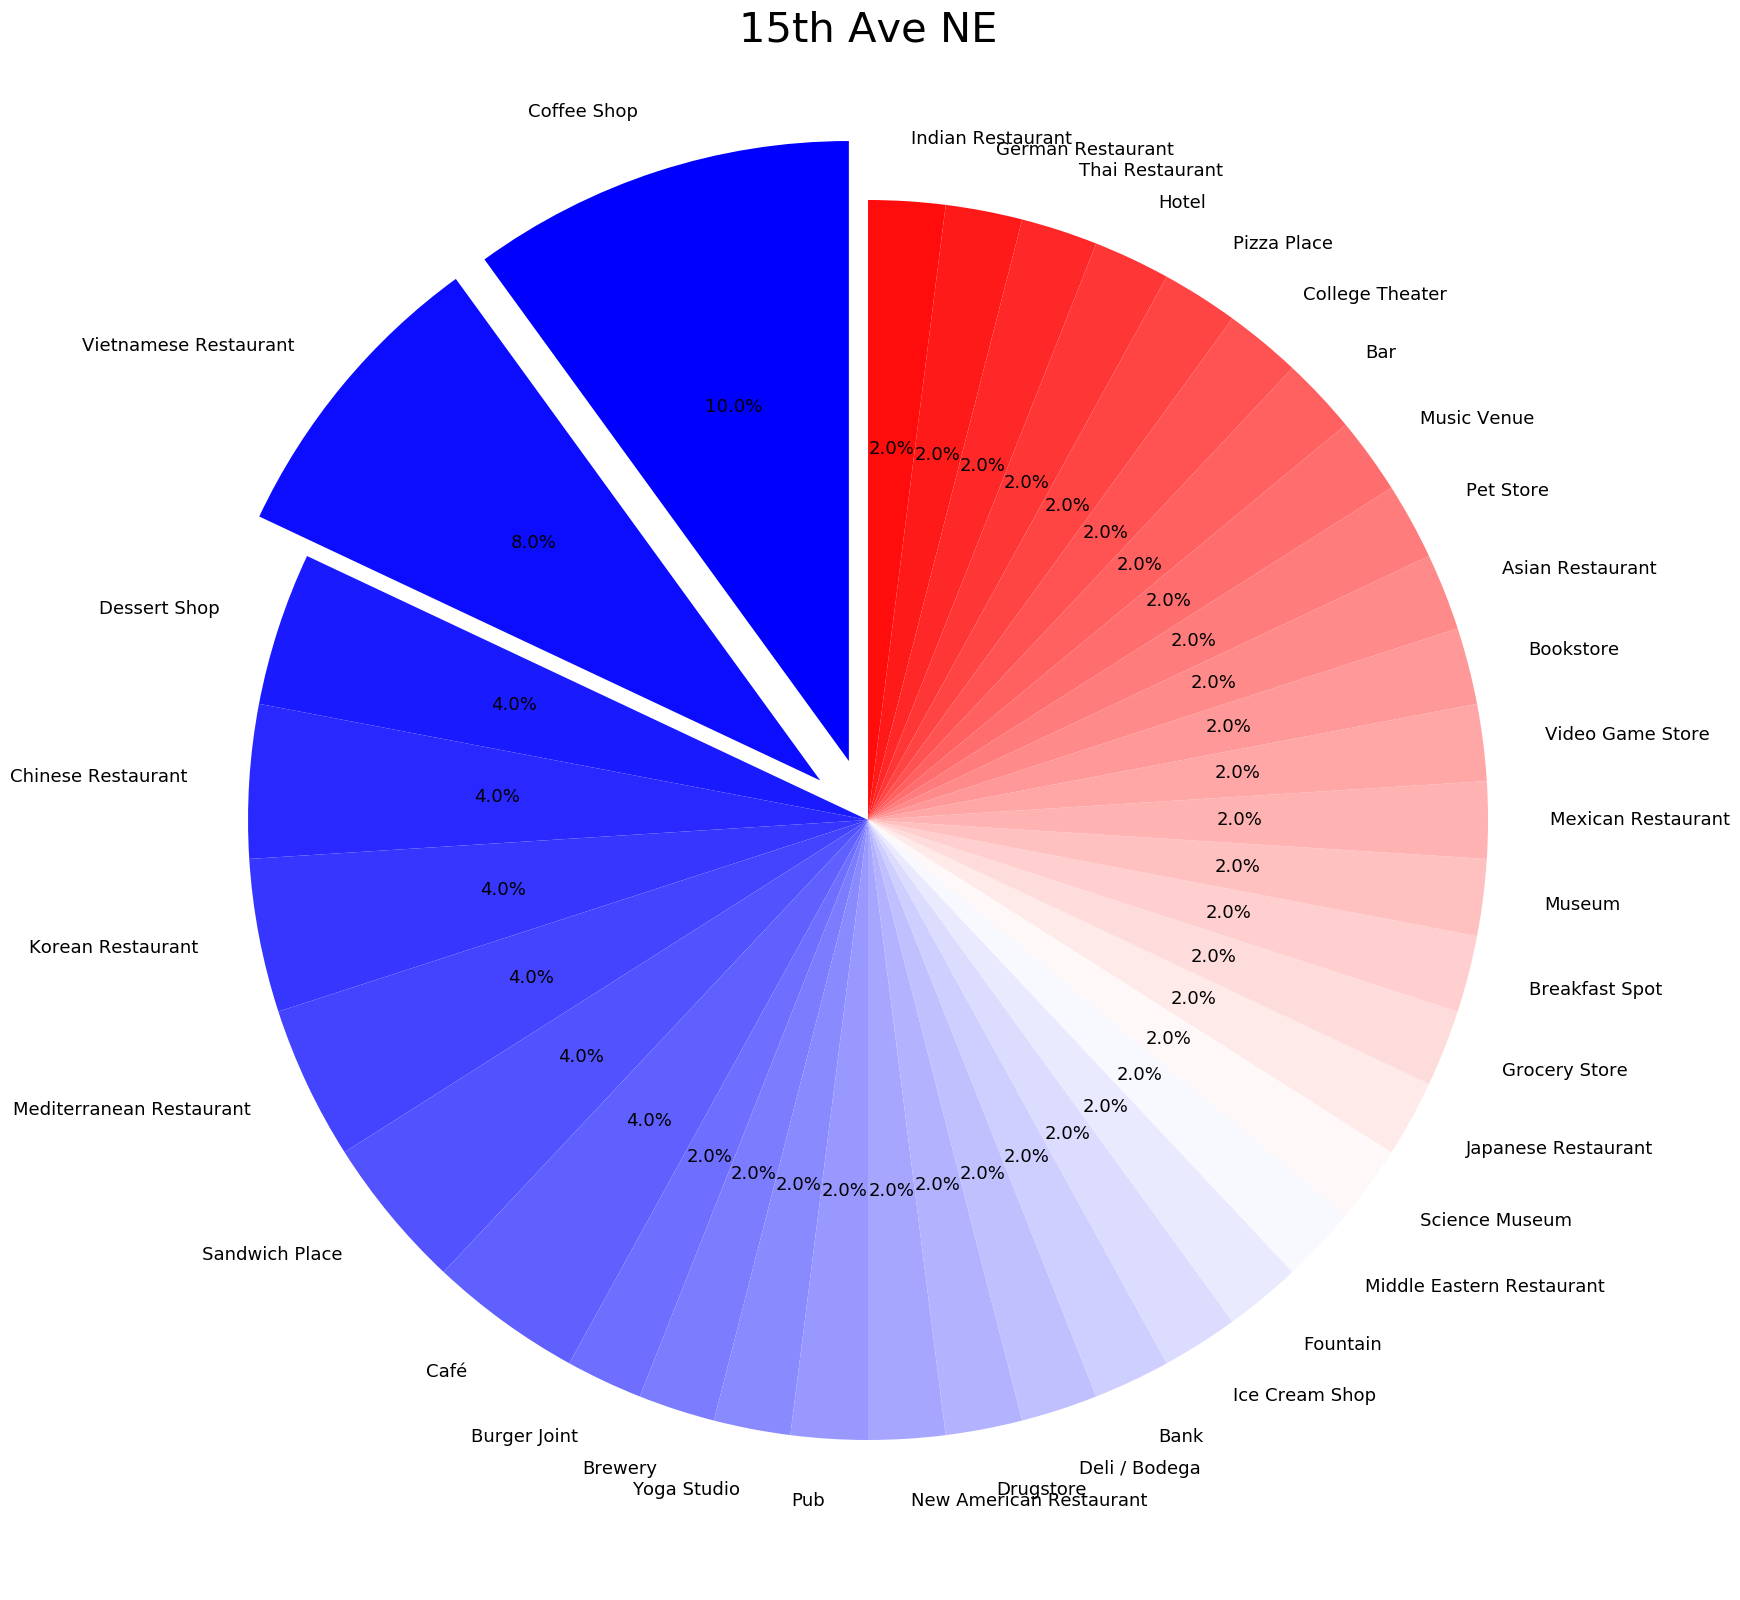

<Figure size 640x480 with 0 Axes>

In [172]:
import matplotlib.pyplot as plt

# use a pie chart to show porportions of each category 

# highlight the 1st and the 2nd most occurred
explode = [0.1, 0.1]
for i in range(35):
    explode.append(0.0)

# set up porportions, lables, and figure
labels = cat_count['categories']
sizes = cat_count['count'].values
fig1, ax1 = plt.subplots(figsize=(20,20))

# set color
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

ax1.axis('equal')
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 13})
ax1.set_title('15th Ave NE', fontsize = 30)

plt.show()
plt.savefig('AveCat.png')

In [89]:
# show all coffee shops
coffee = dataframe_filtered[dataframe_filtered['categories'] == 'Coffee Shop']
coffee

,name,categories,address,rating,id
12,Bean and Bagel,Coffee Shop,1410 NE 40th St,7.9,4a969ee0f964a520642620e3
17,Cafe Solstice,Coffee Shop,4116 University Way NE,7.7,45fc3064f964a52075441fe3
27,Bulldog News,Coffee Shop,4208 University Way NE,7.5,4a8b6bbef964a5206c0c20e3
31,Cafe Allegro,Coffee Shop,4214 University Way NE,7.3,40b3de00f964a52039001fe3
45,Starbucks,Coffee Shop,NaN,6.8,526eb87a11d25d3974d66bbd


In [90]:
# show all vietnamese restaurants
viet = dataframe_filtered[dataframe_filtered['categories'] == 'Vietnamese Restaurant']
viet

,name,categories,address,rating,id
6,Sizzle&Crunch,Vietnamese Restaurant,1313 NE 42nd St,8.2,5867284cb6e67d49c183e8cf
22,Pho Shizzle,Vietnamese Restaurant,NaN,7.6,5755da29498e597087435be8
25,Saigon Deli,Vietnamese Restaurant,4142 Brooklyn Ave NE #103,7.5,4b425046f964a52069d125e3
48,Thanh Vi,Vietnamese Restaurant,4226 University Way NE,6.7,4a8c5c9bf964a520c80d20e3


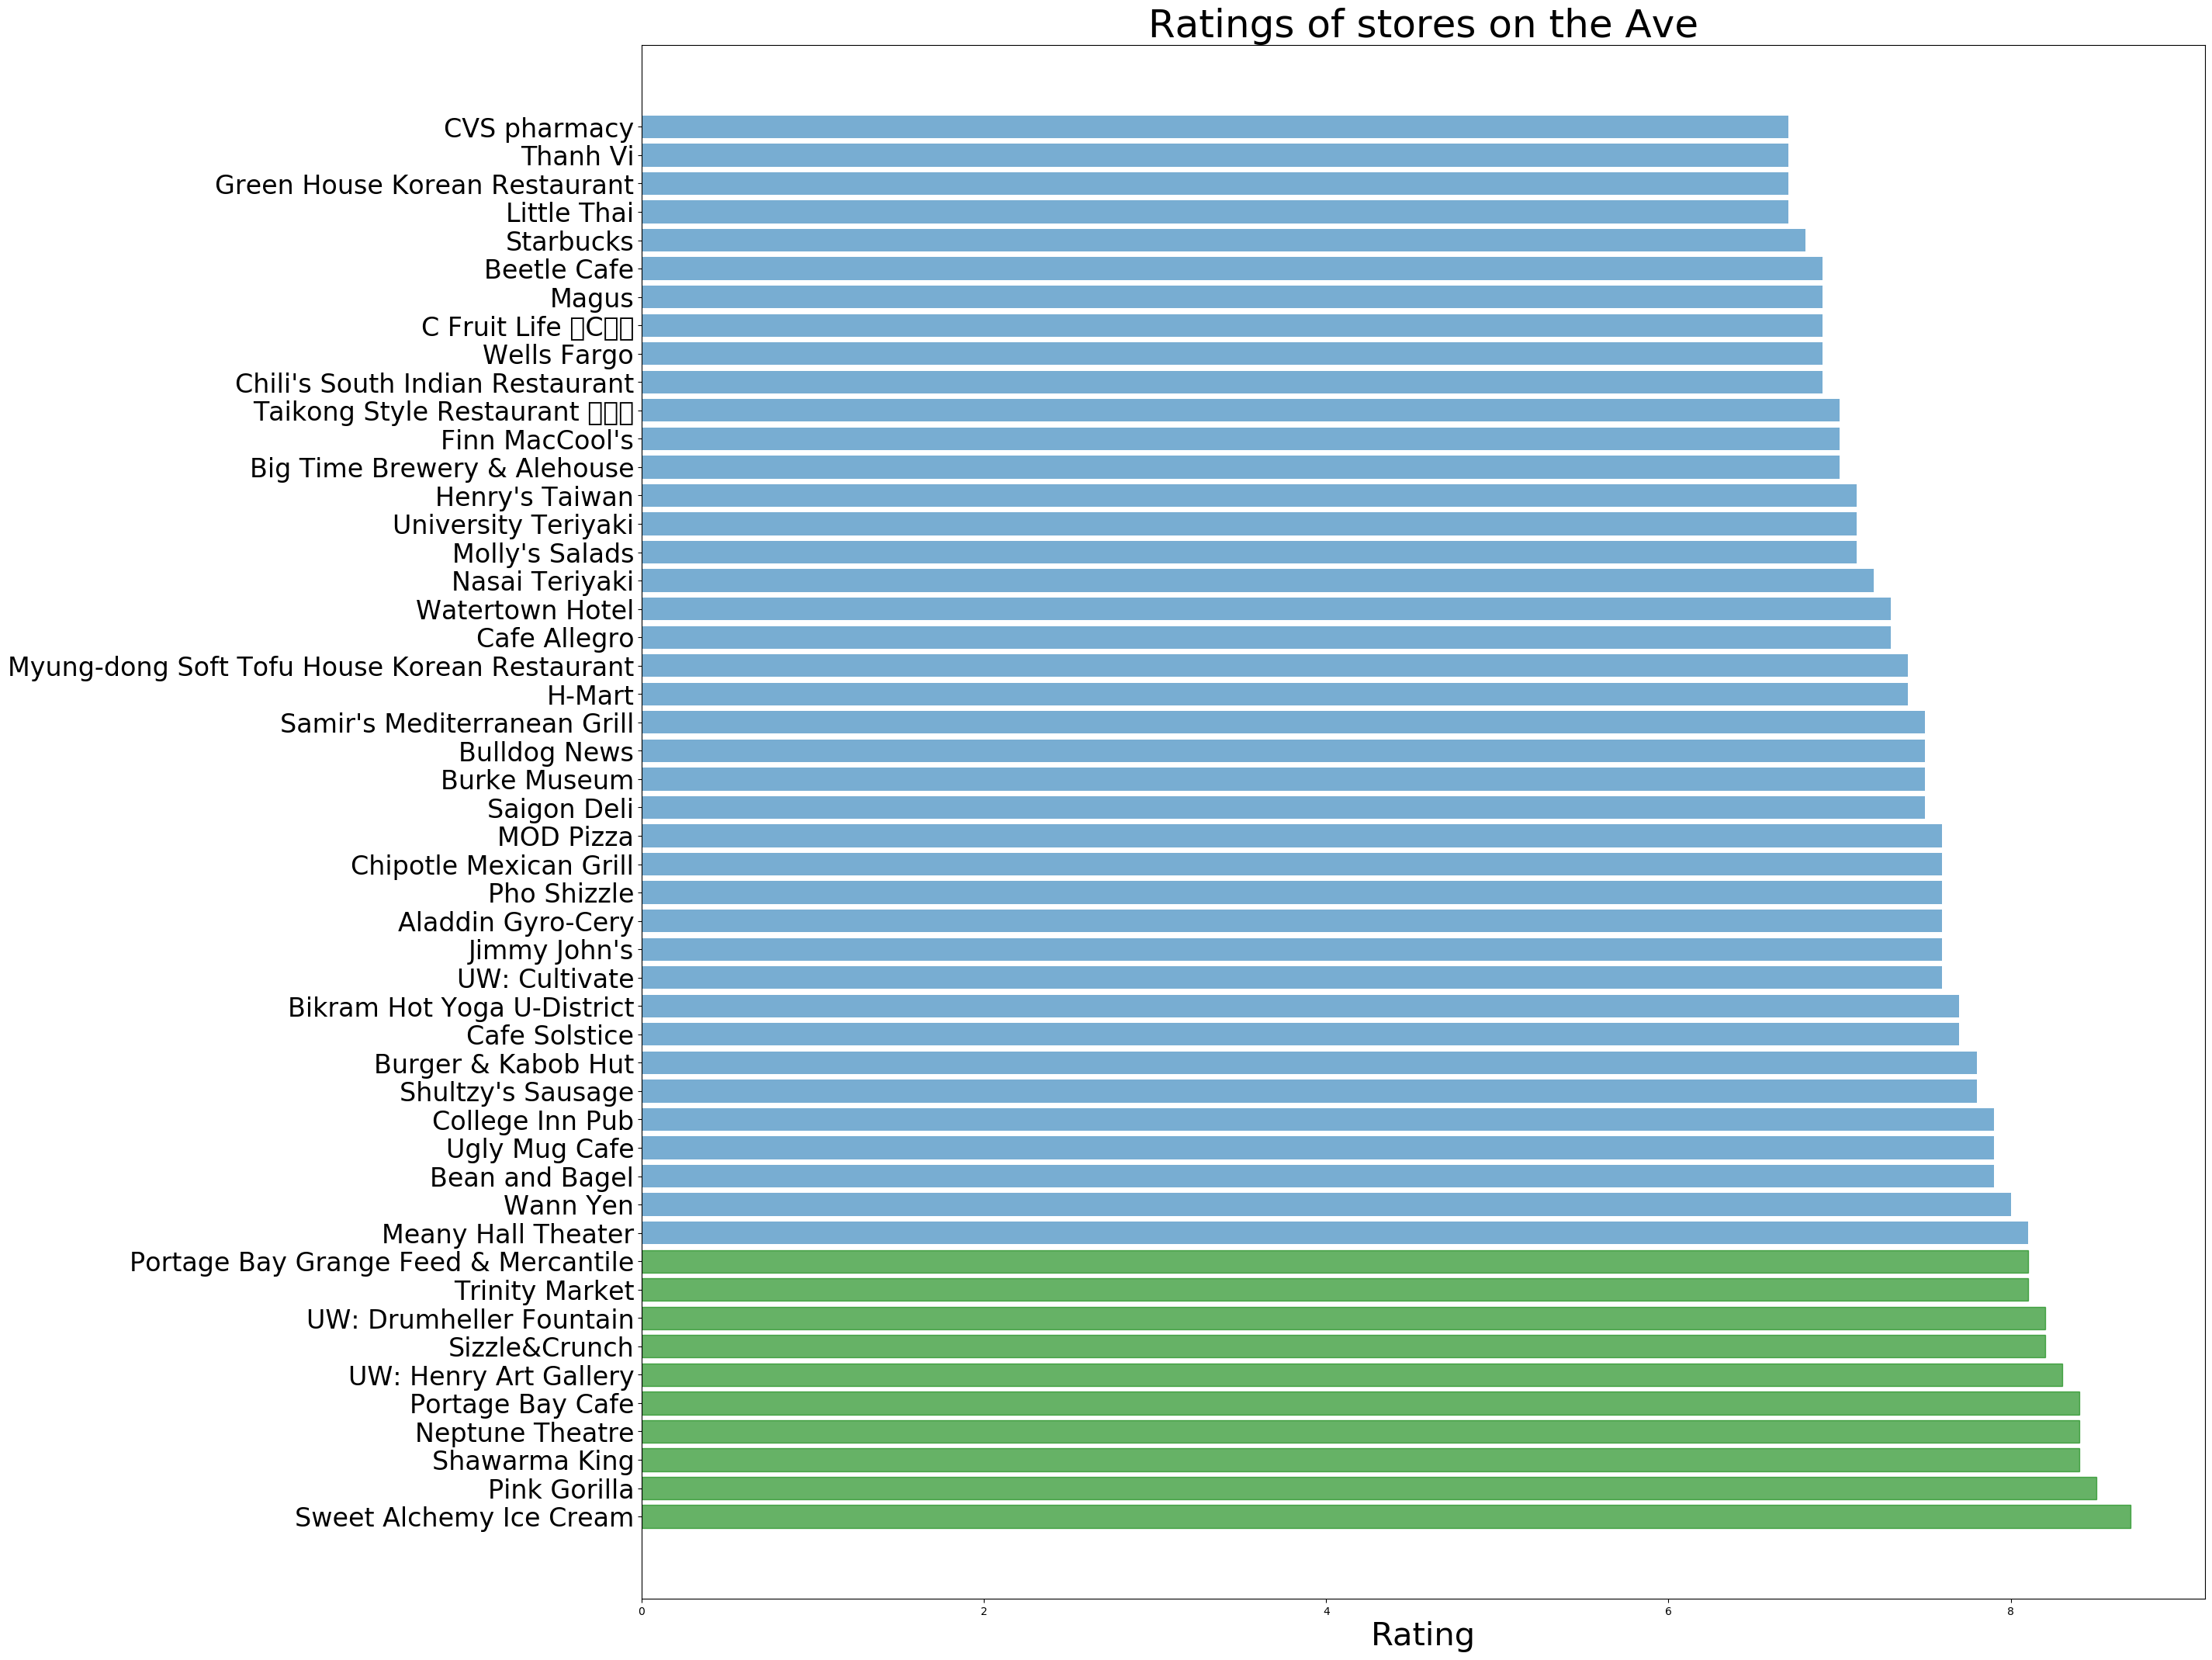

<Figure size 640x480 with 0 Axes>

In [174]:
# show venues by rating order and highlight the top 10 scored venues
fig, ax = plt.subplots(figsize=(26,26))
barlist = plt.barh(dataframe_filtered.index, dataframe_filtered['rating'].values, align='center', alpha = 0.6)
plt.yticks(dataframe_filtered.index, dataframe_filtered['name'], fontsize = 24)
plt.xlabel('Rating', fontsize = 30)
plt.title('Ratings of stores on the Ave', fontsize = 36)
for i in range(10):
    barlist[i].set_color('g')
plt.show()
plt.savefig('AveRating.png')

In [175]:
# get University village's longitude and latitude
address = '2623 NE University Village St, Seattle, WA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

47.6626739 -122.2991137


In [183]:
# pass in University village's location to explore nearby venues
url_uw = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
results = requests.get(url_uw).json()

# get uw's nearby venues
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '52bf895b498e1205b1603e73',
  'name': 'Din Tai Fung 鼎泰豐',
  'location': {'address': '2621 NE 46th St',
   'crossStreet': 'University Village, 2nd Floor',
   'lat': 47.661567,
   'lng': -122.299725,
   'labeledLatLngs': [{'label': 'display',
     'lat': 47.661567,
     'lng': -122.299725}],
   'distance': 131,
   'postalCode': '98105',
   'cc': 'US',
   'neighborhood': 'University District',
   'city': 'Seattle',
   'state': 'WA',
   'country': 'United States',
   'formattedAddress': ['2621 NE 46th St (University Village, 2nd Floor)',
    'Seattle, WA 98105',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d108941735',
    'name': 'Dumpling Restaurant',
    'pluralName': 'Dumpling Restaurants',
    'shortName': 'Dumplings',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dumplings_',
     'suffi

In [184]:
# create a dataframe showing all returned venues

dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,Din Tai Fung 鼎泰豐,Dumpling Restaurant,2621 NE 46th St,"University Village, 2nd Floor",47.661567,-122.299725,"[{'label': 'display', 'lat': 47.661567, 'lng':...",131,98105,US,University District,Seattle,WA,United States,"[2621 NE 46th St (University Village, 2nd Floo...",52bf895b498e1205b1603e73
1,Molly Moon's Homemade Ice Cream,Ice Cream Shop,2615 NE 46th St,in University Village,47.661702,-122.299670,"[{'label': 'display', 'lat': 47.661702, 'lng':...",115,98105,US,NaN,Seattle,WA,United States,"[2615 NE 46th St (in University Village), Seat...",527ead51498e9cdc232bc428
2,Rachel's Ginger Beer,Food & Drink Shop,4626 26th Ave NE,NaN,47.662506,-122.299758,"[{'label': 'display', 'lat': 47.66250600254707...",51,98105,US,Northeast Seattle,Seattle,WA,United States,"[4626 26th Ave NE, Seattle, WA 98105, United S...",58ed37c99c439d7e2381ff01
3,University Village,Shopping Plaza,2623 NE University Village St,NaN,47.662487,-122.298531,NaN,48,98105,US,NaN,Seattle,WA,United States,"[2623 NE University Village St, Seattle, WA 98...",43768200f964a5204b2a1fe3
4,Fran's Chocolates,Chocolate Shop,2626 NE University Village St,in University Village,47.663635,-122.299002,"[{'label': 'display', 'lat': 47.66363539765815...",107,98105,US,University District,Seattle,WA,United States,[2626 NE University Village St (in University ...,4ac82398f964a520cbbb20e3
5,InSpa,Spa,2641 NE University Village St,at U Village,47.662905,-122.298813,"[{'label': 'display', 'lat': 47.66290509483611...",34,98105,US,NaN,Seattle,WA,United States,"[2641 NE University Village St (at U Village),...",4af0df90f964a520d0df21e3
6,Trophy Cupcakes,Cupcake Shop,2612 NE Village Ln,in University Village,47.662392,-122.299523,"[{'label': 'display', 'lat': 47.66239195766710...",43,98105,US,NaN,Seattle,WA,United States,"[2612 NE Village Ln (in University Village), S...",4a493f6df964a52023ab1fe3
7,Evergreens,Salad Place,University Village 4609 Village Terrace NE Se...,4609 Village Terrace NE,47.662123,-122.298642,"[{'label': 'display', 'lat': 47.66212259225466...",70,98105,US,NaN,Seattle,WA,United States,[University Village 4609 Village Terrace NE S...,56415791498e385fae557d3f
8,lululemon athletica,Clothing Store,2656 NE University Village St,NaN,47.664083,-122.298476,"[{'label': 'display', 'lat': 47.6640832, 'lng'...",164,98105,US,NaN,Seattle,WA,United States,"[2656 NE University Village St, Seattle, WA 98...",4b11c2a0f964a5200e8423e3
9,Crate & Barrel,Furniture / Home Store,2680 NE 49th St,University Village,47.664379,-122.298335,"[{'label': 'display', 'lat': 47.66437939863477...",198,98105,US,NaN,Seattle,WA,United States,"[2680 NE 49th St (University Village), Seattle...",4a7e25e4f964a5202af11fe3


In [124]:
# create a second map with all venues listed, each popup shows its name and category

venues_map2 = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='University of Washington',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map2)

# add the Italian restaurants as blue circle markers
for lat, lng, name, cat in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name, dataframe_filtered.categories):
    label = '{}, {}'.format(name, cat)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)

# display map
venues_map2

In [185]:
# get all venues' ratings
rating = []

for venue_id in dataframe_filtered['id']:
    url_each = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result_each = requests.get(url_each).json()
    try:
        rating.append(result_each['response']['venue']['rating'])
    except:
        rating.append(-1)
rating

[9.0,
 9.0,
 8.8,
 8.8,
 8.8,
 8.8,
 8.5,
 8.4,
 8.4,
 8.3,
 8.3,
 8.3,
 8.4,
 8.2,
 8.1,
 8.1,
 8.0,
 8.0,
 7.9,
 7.9,
 7.9,
 7.9,
 7.8,
 7.8,
 7.8,
 7.8,
 7.7,
 7.7,
 7.7,
 7.7,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.5,
 7.5,
 7.5,
 7.5,
 7.4,
 7.4,
 7.4,
 7.3,
 7.3,
 7.3,
 7.2,
 7.2,
 7.2]

In [186]:
# add ratings to the dataframe, and clean the dataframe with only name, categories, address, rating, and id left
dataframe_filtered['rating'] = rating
dataframe_filtered = dataframe_filtered.loc[:,['name', 'categories', 'address', 'rating', 'id']]

# sort venues based on ratings in descending order
dataframe_filtered = dataframe_filtered.sort_values('rating', ascending=False).reset_index(drop=True)
dataframe_filtered

,name,categories,address,rating,id
0,Din Tai Fung 鼎泰豐,Dumpling Restaurant,2621 NE 46th St,9.0,52bf895b498e1205b1603e73
1,Molly Moon's Homemade Ice Cream,Ice Cream Shop,2615 NE 46th St,9.0,527ead51498e9cdc232bc428
2,Rachel's Ginger Beer,Food & Drink Shop,4626 26th Ave NE,8.8,58ed37c99c439d7e2381ff01
3,Fran's Chocolates,Chocolate Shop,2626 NE University Village St,8.8,4ac82398f964a520cbbb20e3
4,InSpa,Spa,2641 NE University Village St,8.8,4af0df90f964a520d0df21e3
5,University Village,Shopping Plaza,2623 NE University Village St,8.8,43768200f964a5204b2a1fe3
6,Trophy Cupcakes,Cupcake Shop,2612 NE Village Ln,8.5,4a493f6df964a52023ab1fe3
7,lululemon athletica,Clothing Store,2656 NE University Village St,8.4,4b11c2a0f964a5200e8423e3
8,SkinSpirit Seattle - University Village,Spa,2692 Northeast 49th Street,8.4,5d6c0efbfadc2c0007bf2c51
9,Evergreens,Salad Place,University Village 4609 Village Terrace NE Se...,8.4,56415791498e385fae557d3f


In [187]:
# see the number of unique categories
print('There are {} uniques categories.'.format(len(dataframe_filtered['categories'].unique())))

There are 37 uniques categories.


In [181]:
# create a dataframe showing the occurrence of each category
cat_count = dataframe_filtered['categories'].value_counts()
cat_count = cat_count.reset_index()
cat_count.columns = ['categories', 'count']
cat_count

,categories,count
0,Furniture / Home Store,4
1,Arts & Crafts Store,3
2,Women's Store,3
3,Cosmetics Shop,3
4,Electronics Store,2
5,Pizza Place,2
6,Spa,2
7,Lingerie Store,2
8,Miscellaneous Shop,1
9,Fried Chicken Joint,1


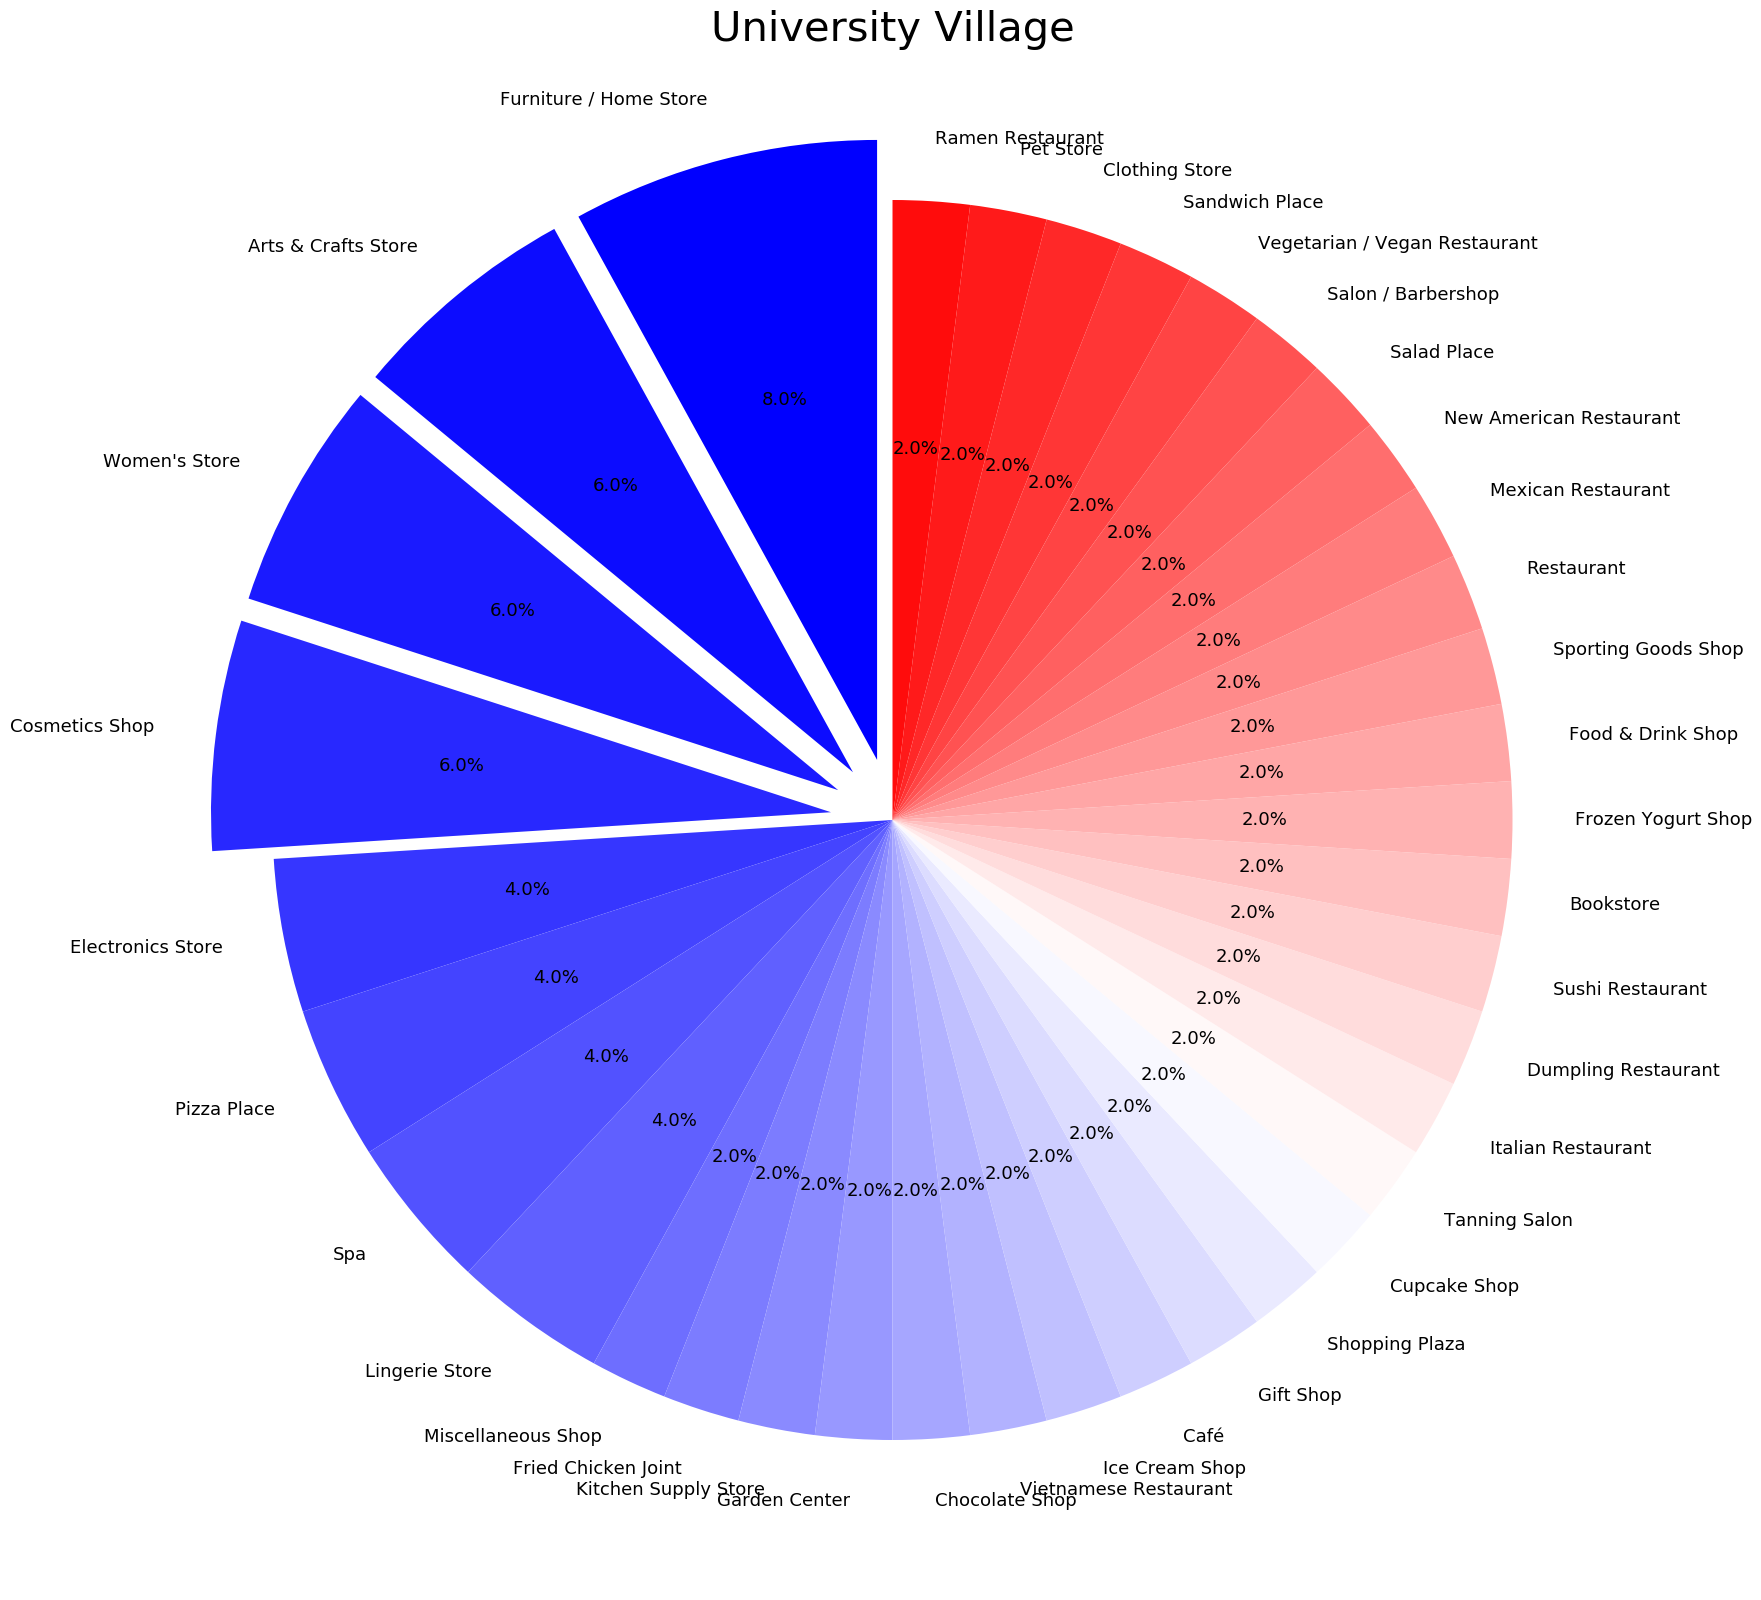

<Figure size 640x480 with 0 Axes>

In [182]:
# use a pie chart to show porportions of each category 

# highlight the 1st and the 2nd most occurred
explode = [0.1, 0.1,0.1,0.1]
for i in range(33):
    explode.append(0.0)

# set up porportions, lables, and figure
labels = cat_count['categories']
sizes = cat_count['count'].values
fig1, ax1 = plt.subplots(figsize=(20,20))

# set color
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

ax1.axis('equal')
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 13})
ax1.set_title('University Village', fontsize = 30)

plt.show()
plt.savefig('UVCat.png')

In [188]:
# show all furniture and home stores
home = dataframe_filtered[dataframe_filtered['categories'] == 'Furniture / Home Store']
home

,name,categories,address,rating,id
10,Crate & Barrel,Furniture / Home Store,2680 NE 49th St,8.3,4a7e25e4f964a5202af11fe3
29,Room & Board,Furniture / Home Store,2675 NE University Village Street,7.7,4f46bd9ce4b01e144cb59b82
47,Pottery Barn Kids,Furniture / Home Store,4633 26th Ave NE,7.2,4aee014ff964a5202bd121e3
49,CB2,Furniture / Home Store,2660 NE 49th St,7.2,5ae0eb23b6eedb002c8d5b56


In [189]:
# show all arts and crafts stores
crafts = dataframe_filtered[dataframe_filtered['categories'] == 'Arts & Crafts Store']
crafts

,name,categories,address,rating,id
15,Paper Source,Arts & Crafts Store,2606 NE 46th St,8.1,4e458e3a483b03d090d425fd
30,Paint The Town,Arts & Crafts Store,2614 NE 46th St,7.6,4b2c2b59f964a5200ac324e3
33,IMPRESS,Arts & Crafts Store,2621 NE Village Ln,7.6,4b29a91cf964a5203da224e3


In [190]:
# show all womens stores
women = dataframe_filtered[dataframe_filtered['categories'] == 'Women\'s Store']
women

,name,categories,address,rating,id
18,Aritzia,Women's Store,2685 Ne University Village,7.9,51421ba5e4b0af3e53fa5710
31,Anthropologie,Women's Store,2520 NE University Village St #120,7.6,49ff61a6f964a52010701fe3
43,Madewell,Women's Store,2666 NE University Village Street,7.4,4c5b8fd7d25320a15616c17a


In [193]:
# show all cosmetics stores
cosmetics = dataframe_filtered[dataframe_filtered['categories'] == 'Cosmetics Shop']
cosmetics

,name,categories,address,rating,id
27,Kiehl's,Cosmetics Shop,2611 NE University Village St,7.7,4b29b1c4f964a5209aa224e3
38,SEPHORA,Cosmetics Shop,2676 NE University Village St,7.5,4a7e1bdcf964a520fbf01fe3
39,Aveda,Cosmetics Shop,2622 NE University Village #727,7.5,4b09cc33f964a520d01d23e3


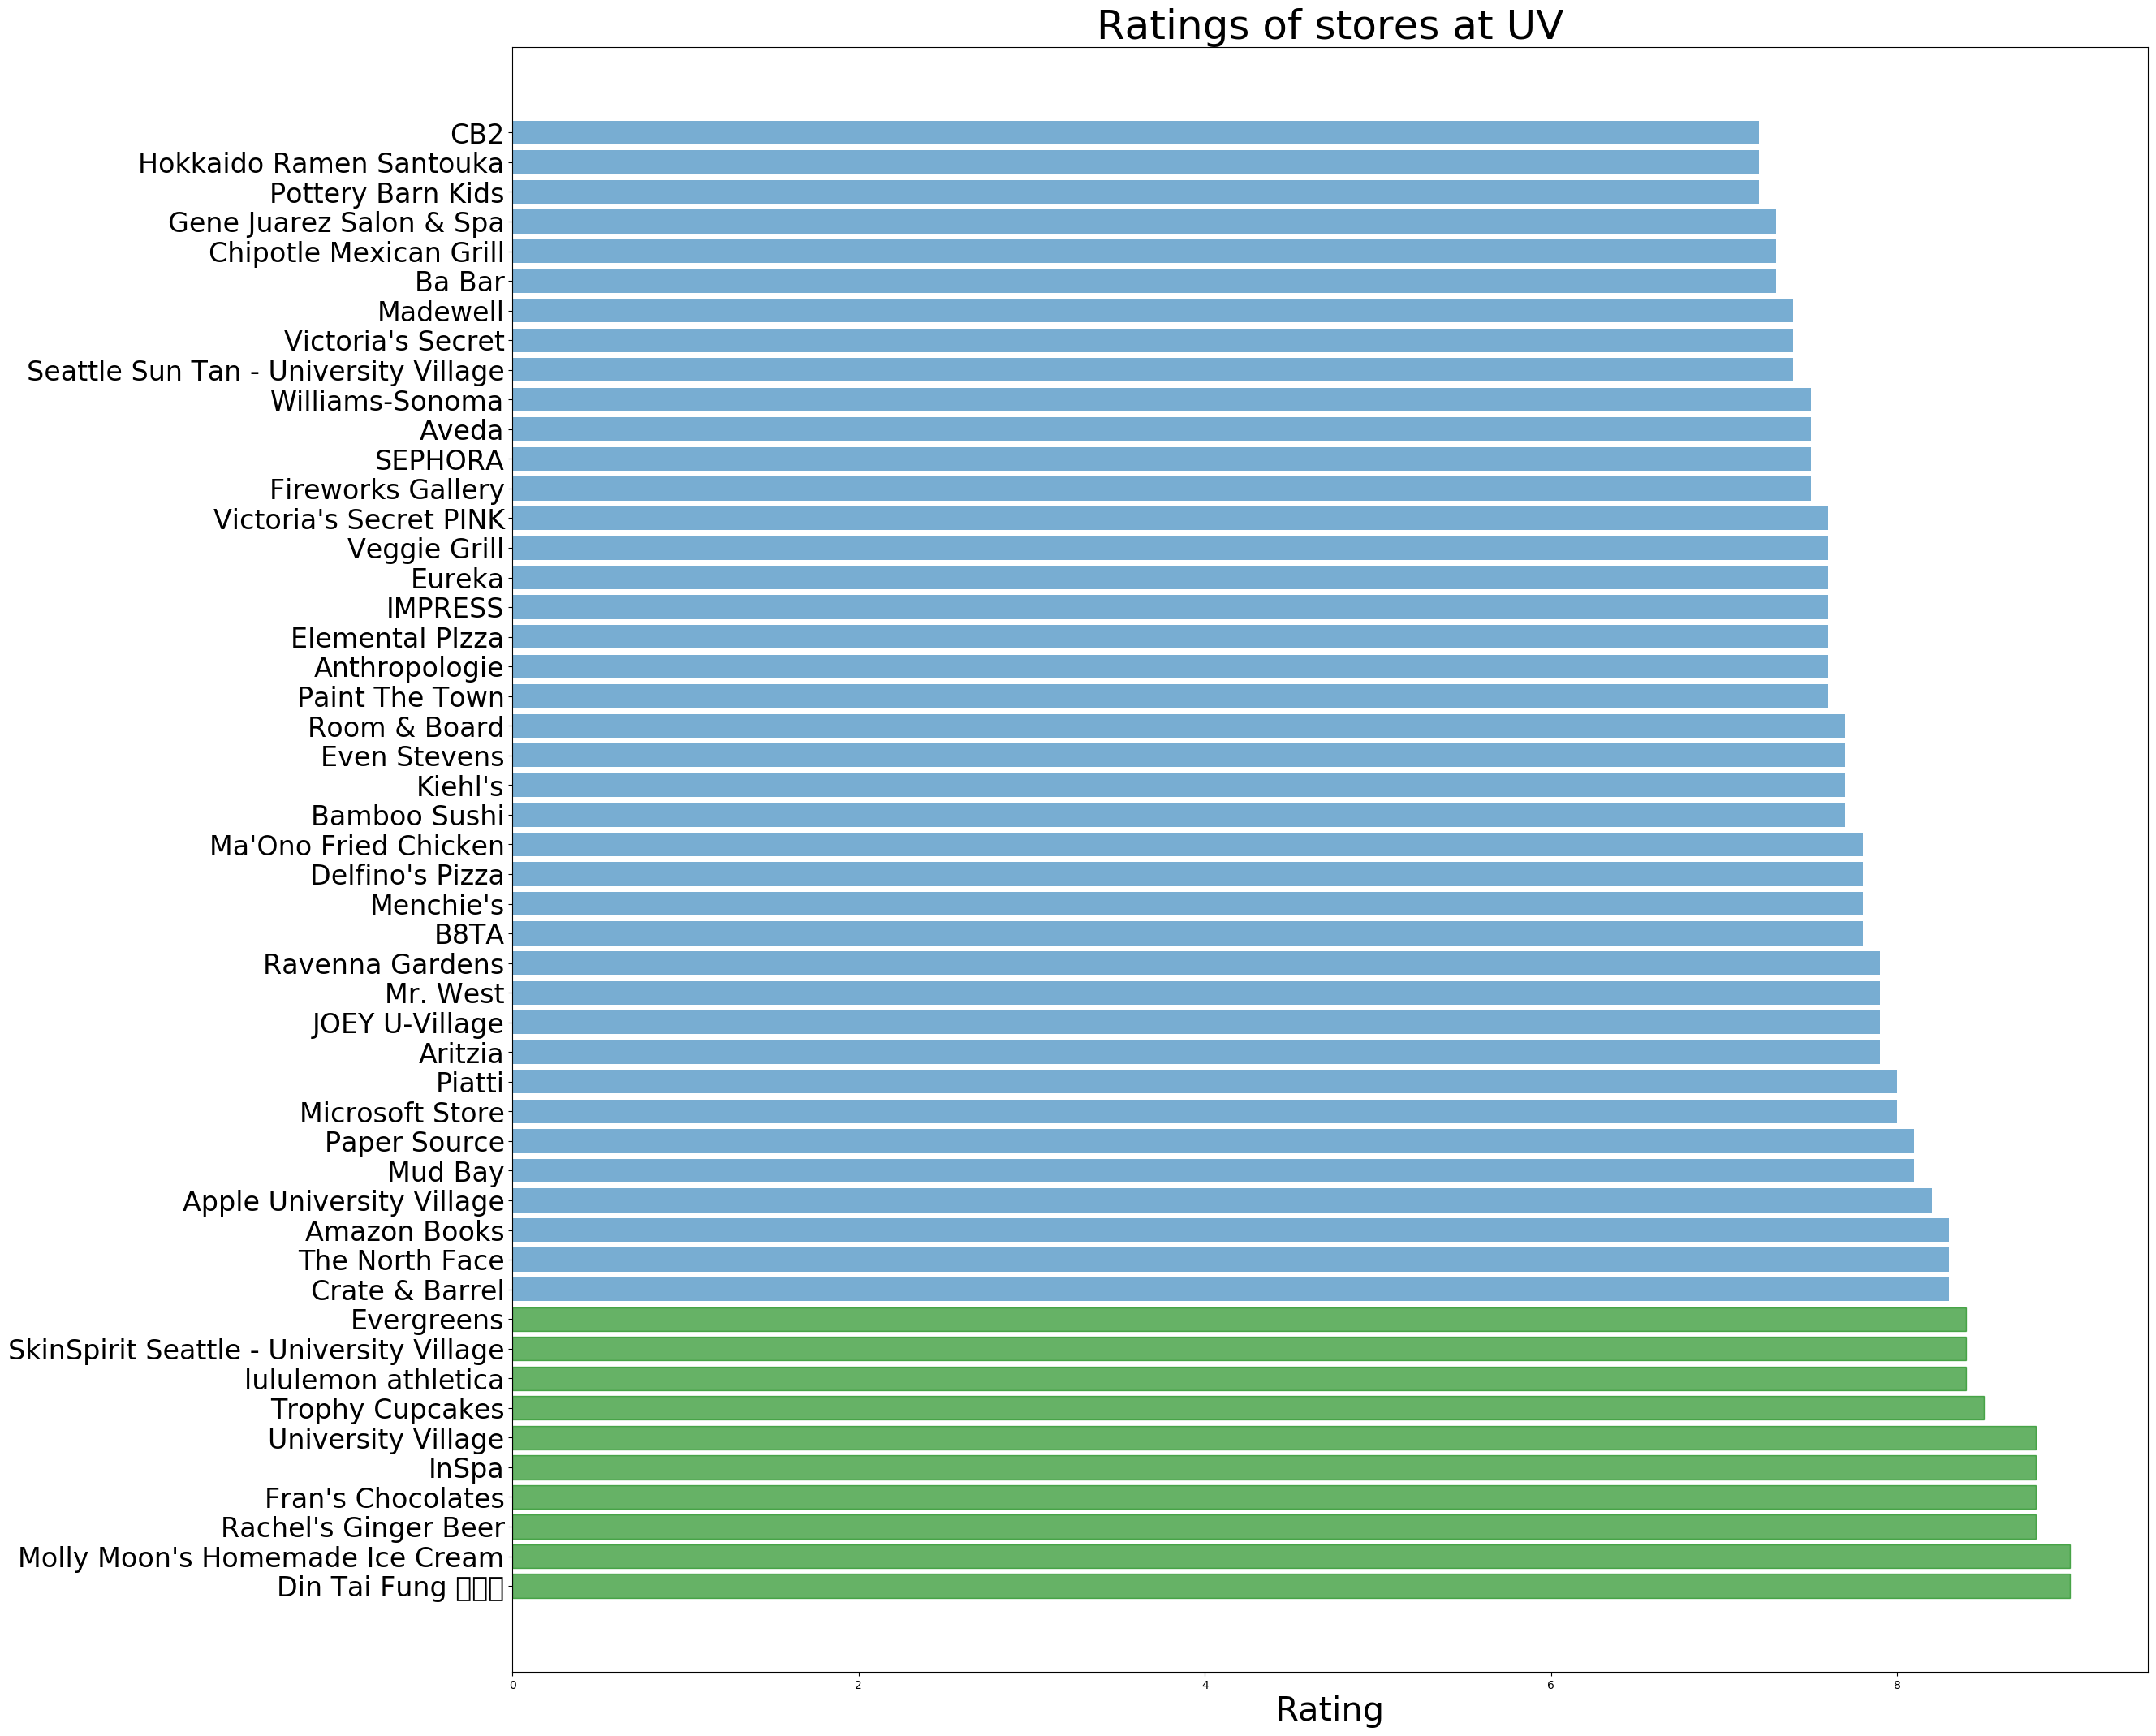

<Figure size 640x480 with 0 Axes>

In [194]:
# show venues by rating order and highlight the top 10 scored venues
fig, ax = plt.subplots(figsize=(26,26))
barlist = plt.barh(dataframe_filtered.index, dataframe_filtered['rating'].values, align='center', alpha = 0.6)
plt.yticks(dataframe_filtered.index, dataframe_filtered['name'], fontsize = 24)
plt.xlabel('Rating', fontsize = 30)
plt.title('Ratings of stores at UV', fontsize = 36)
for i in range(10):
    barlist[i].set_color('g')
plt.show()
plt.savefig('UVRating.png')